## Support Vector Regression

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the dataset
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
# transform y to 2d array

y = y.reshape(len(y), 1)

In [4]:
# feature scaling - the target is much higher than feature,  it must be scaled
# for the SVR model. 

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
# scaler both matrix of features and independant variable
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [5]:
# train the SVR model on the whole dataset with
# radial basis function kernel
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")

regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [6]:
# predict a new result
# as x, y were both scaled when we predict
# we have to use the scaling values
# the below will bring back the predict in the scale
# it must be reversed 
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

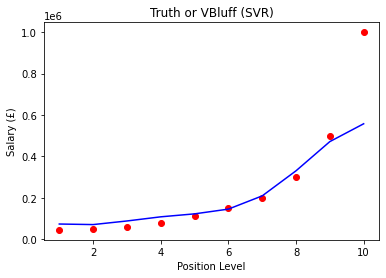

In [9]:
# visualise the SVR results
# reverse the scale on x and y
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color="blue")
plt.title("Truth or VBluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary (£)")
plt.show()

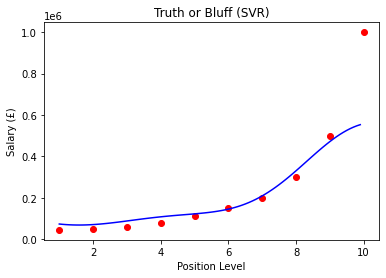

In [13]:
# visualise with higher contrast
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary (£)')
plt.show()